In [1]:
from ex1_student_solution import Solution
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
mat = sio.loadmat('matches_perfect.mat')
match_p_src = mat['match_p_src']
match_p_dst = mat['match_p_dst']

In [3]:
H = Solution.compute_homography_naive(match_p_src, match_p_dst)

In [4]:
src_image = plt.imread('src.jpg')
dst_image = plt.imread('dst.jpg')
dst_image_forward = Solution.compute_forward_homography_slow(H, src_image, dst_image.shape)

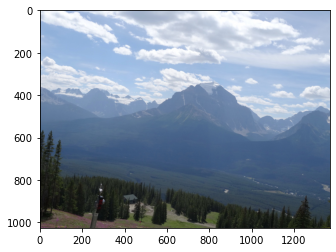

In [7]:
plt.imshow(src_image)

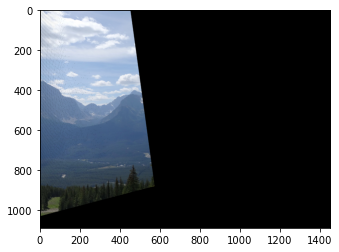

In [5]:
plt.imshow(dst_image_forward)

In [9]:
        h, w = src_image.shape[0], src_image.shape[1]
        xx, yy = np.meshgrid(range(h), range(w))
        xx, yy = xx.reshape(1, -1), yy.reshape(1, -1)
        coordinate_matrix = np.squeeze(np.array([yy, xx, np.ones((1, h * w))]))
        transformed_coordinate_matrix = np.matmul(H, coordinate_matrix)
        transformed_coordinate_matrix = transformed_coordinate_matrix / transformed_coordinate_matrix[2, :]
        transformed_coordinate_matrix = np.round(transformed_coordinate_matrix).astype(int)